In [45]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import linear_model
from regressors import stats

In [46]:
df = pd.read_excel("fragile_state_index.xlsx", header=[0])
#pd.read_excel("/tmp/sample.xlsx", usecols = "B:F", skiprows=[0])

In [47]:
    dictionary = {"key1": "value1"}
print(dictionary["key1"])

value1


In [48]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(df.dtypes)

Country                              object
Year                                 object
Rank                                 object
Total                               float64
C1: Security Apparatus              float64
C2: Factionalized Elites            float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object


In [49]:
df

,Country,Year,Rank,Total,C1: Security Apparatus,C2: Factionalized Elites,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,Sudan,2006,1st,112.300000,9.8,9.1,9.7,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,Congo Democratic Republic,2006,2nd,110.100000,9.8,9.6,9.1,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,Cote d'Ivoire,2006,3rd,109.200000,9.8,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,Iraq,2006,4th,109.000000,9.8,9.7,9.8,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,Zimbabwe,2006,5th,108.900000,9.4,8.5,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5291,Iceland,2020-01-01 00:00:00,174th,17.800000,1.0,1.8,0.7,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
5292,Denmark,2020-01-01 00:00:00,175th,17.213587,1.6,1.4,4.0,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
5293,Switzerland,2020-01-01 00:00:00,176th,17.094086,1.4,1.0,3.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
5294,Norway,2020-01-01 00:00:00,177th,16.191210,1.8,1.1,3.6,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [50]:
# Create dummy variables for the category_columns and merge on the numeric_columns to create an X dataset
# Define target data
# Create category_columns and numeric_columns variables
X = df.drop(['Country', 'Rank','Year','Total', 'C2: Factionalized Elites'], axis=1)
X 

,C1: Security Apparatus,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
0,9.8,9.7,7.50000,9.2,9.1,9.5,9.500000,9.8,9.600000,9.7,9.8,NaN
1,9.8,9.1,8.10000,9.0,8.0,9.0,9.000000,9.5,9.500000,9.5,10.0,NaN
2,9.8,9.8,9.00000,8.0,8.5,10.0,8.500000,9.4,8.800000,7.6,10.0,NaN
3,9.8,9.8,8.20000,8.7,9.1,8.5,8.300000,9.7,8.900000,8.3,10.0,NaN
4,9.4,8.5,9.80000,9.2,9.0,8.9,9.500000,9.5,9.700000,8.9,8.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5291,1.0,0.7,2.80000,1.0,2.2,0.7,0.700000,0.7,1.000000,1.7,3.5,-2.000000
5292,1.6,4.0,1.30000,0.9,1.6,0.6,0.913587,1.4,1.300000,1.7,0.5,-2.286413
5293,1.4,3.0,1.60000,1.5,1.4,0.5,1.052499,1.1,1.241587,2.8,0.5,-1.605914
5294,1.8,3.6,1.69121,0.7,1.0,0.5,1.100000,0.6,0.900000,2.5,0.7,-1.808790


In [51]:
# Fill in missing values in X with zeroes
X = X.fillna(0)
y = df['C2: Factionalized Elites']

In [52]:
pd.set_option('display.max_columns', 500)

In [53]:
X.apply(lambda s: pd.to_numeric(s, errors='coerce').notnull().all())

C1: Security Apparatus              True
C3: Group Grievance                 True
E1: Economy                         True
E2: Economic Inequality             True
E3: Human Flight and Brain Drain    True
P1: State Legitimacy                True
P2: Public Services                 True
P3: Human Rights                    True
S1: Demographic Pressures           True
S2: Refugees and IDPs               True
X1: External Intervention           True
Change from Previous Year           True
dtype: bool

In [54]:
X.dtypes

C1: Security Apparatus              float64
C3: Group Grievance                 float64
E1: Economy                         float64
E2: Economic Inequality             float64
E3: Human Flight and Brain Drain    float64
P1: State Legitimacy                float64
P2: Public Services                 float64
P3: Human Rights                    float64
S1: Demographic Pressures           float64
S2: Refugees and IDPs               float64
X1: External Intervention           float64
Change from Previous Year           float64
dtype: object

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=60)

In [56]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
X_train.head()

,C1: Security Apparatus,C3: Group Grievance,E1: Economy,E2: Economic Inequality,E3: Human Flight and Brain Drain,P1: State Legitimacy,P2: Public Services,P3: Human Rights,S1: Demographic Pressures,S2: Refugees and IDPs,X1: External Intervention,Change from Previous Year
1638,5.0,7.9,5.7,6.9,6.8,5.0,6.6,6.5,6.0,6.9,7.9,0.0
4963,8.2,8.5,6.4,6.5,6.6,8.0,8.3,8.2,9.0,8.7,7.9,-5.3
23,5.0,9.0,8.0,7.2,8.2,8.7,6.9,7.7,9.5,7.0,6.8,0.0
1667,6.5,5.9,5.1,8.4,5.2,7.1,6.7,6.1,5.9,2.2,4.4,0.0
3305,4.0,4.0,3.9,4.6,4.3,4.3,3.5,3.6,3.9,6.0,5.0,0.0


In [58]:
nn_model = tf.keras.models.Sequential()

In [59]:
nn_model.add(tf.keras.layers.Dense(units=len(X.columns) * 2, activation = "relu", input_dim = len(X.columns)))

In [60]:
nn_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [61]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 25        
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________


In [62]:
nn_model.compile(loss="mean_squared_error", optimizer="adam")

In [63]:
nn_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
125/125 [==============================] - 0s 486us/step - loss: 21.7106
Epoch 2/100
125/125 [==============================] - 0s 473us/step - loss: 1.8526
Epoch 3/100
125/125 [==============================] - 0s 479us/step - loss: 1.4970
Epoch 4/100
125/125 [==============================] - 0s 480us/step - loss: 1.2913
Epoch 5/100
125/125 [==============================] - 0s 421us/step - loss: 1.0885
Epoch 6/100
125/125 [==============================] - 0s 463us/step - loss: 0.9748
Epoch 7/100
125/125 [==============================] - 0s 471us/step - loss: 0.9134
Epoch 8/100
125/125 [==============================] - 0s 505us/step - loss: 0.8841
Epoch 9/100
125/125 [==============================] - 0s 479us/step - loss: 0.8654
Epoch 10/100
125/125 [==============================] - 0s 552us/step - loss: 0.8524
Epoch 11/100
125/125 [==============================] - 0s 450us/step - loss: 0.8481
Epoch 12/100
125/125 [==============================] - 0s 479us/step - l

In [64]:
y_train_pred = nn_model.predict(X_train_scaled)
y_test_pred = nn_model.predict(X_test_scaled)

In [65]:
r2_score(y_train, y_train_pred)

0.8774005974350837

In [66]:
r2_score(y_test, y_test_pred)

0.8783360937071828

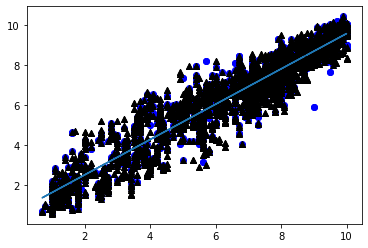

In [67]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [68]:
deep_model = tf.keras.models.Sequential()

In [69]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu', input_dim = len(X.columns)))

In [70]:
deep_model.add(tf.keras.layers.Dense(units=len(X.columns) *2, activation = 'relu'))

In [71]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [72]:
deep_model.add(tf.keras.layers.Dense(units=1, activation="linear"))

In [73]:
deep_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 24)                312       
_________________________________________________________________
dense_9 (Dense)              (None, 24)                600       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 25        
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 2         
Total params: 939
Trainable params: 939
Non-trainable params: 0
_________________________________________________________________


In [74]:
deep_model.compile(loss="mean_squared_error", optimizer="adam")

In [75]:
deep_model.fit(X_train_scaled, np.asarray(y_train), epochs=100)

Epoch 1/100
125/125 [==============================] - 0s 551us/step - loss: 16.0462
Epoch 2/100
125/125 [==============================] - 0s 527us/step - loss: 1.6535
Epoch 3/100
125/125 [==============================] - 0s 558us/step - loss: 1.1941
Epoch 4/100
125/125 [==============================] - 0s 549us/step - loss: 0.9539
Epoch 5/100
125/125 [==============================] - 0s 556us/step - loss: 0.8940
Epoch 6/100
125/125 [==============================] - 0s 577us/step - loss: 0.8763
Epoch 7/100
125/125 [==============================] - 0s 439us/step - loss: 0.8659
Epoch 8/100
125/125 [==============================] - 0s 574us/step - loss: 0.8629
Epoch 9/100
125/125 [==============================] - 0s 514us/step - loss: 0.8620
Epoch 10/100
125/125 [==============================] - 0s 543us/step - loss: 0.8375
Epoch 11/100
125/125 [==============================] - 0s 549us/step - loss: 0.8353
Epoch 12/100
125/125 [==============================] - 0s 557us/step - l

In [76]:
y_train_pred = deep_model.predict(X_train_scaled)
y_test_pred = deep_model.predict(X_test_scaled)

In [77]:
r2_score(y_train, y_train_pred)

0.9004726270623212

In [78]:
r2_score(y_test, y_test_pred)

0.8973542311417428

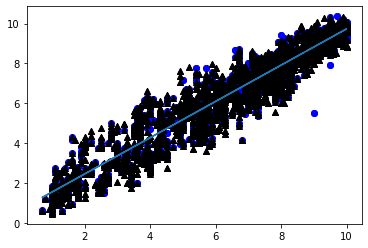

In [79]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [80]:
model = LinearRegression()

In [81]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [82]:
model.score(X_train_scaled, y_train)

0.8668802182438844

In [83]:
model.score(X_test_scaled, y_test)

0.868348194690256

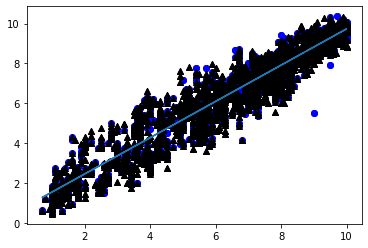

In [84]:
# Regression relationship with Cohesion data
plt.scatter(y_test, y_test_pred, marker='o', c='blue')
plt.scatter(y_train, y_train_pred, marker='^', c='black')
m, b = np.polyfit(y_test, y_test_pred, 1)
plt.plot(y_test, m*y_test + b)
#a, b, c = np.polyfit(y_test, y_test_pred, 2)
#plt.plot(y_test, a*y_test*y_test+b*y_test+c)
# Show the boundary between the regions:
plt.show()

In [85]:
ols = linear_model.LinearRegression()
ols.fit(X_train, y_train)

LinearRegression()

In [86]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_train, y_train))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_train, y_train, X.columns)

coef_pval:
 [5.64219081e-01 0.00000000e+00 0.00000000e+00 1.17490025e-01
 3.00520019e-06 7.83566517e-02 0.00000000e+00 4.47749787e-01
 1.04575934e-01 2.44342723e-04 1.19615857e-08 0.00000000e+00
 0.00000000e+00]

=========== SUMMARY ===========
Residuals:
   Min      1Q  Median      3Q     Max
-2.918 -0.5622 -0.0126  0.5183  3.0407


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                        0.035197    0.061038   0.5766  0.564219
C1: Security Apparatus            0.179659    0.013920  12.9069  0.000000
C3: Group Grievance               0.292696    0.010827  27.0351  0.000000
E1: Economy                       0.020538    0.013117   1.5657  0.117490
E2: Economic Inequality          -0.062608    0.013386  -4.6772  0.000003
E3: Human Flight and Brain Drain -0.020370    0.011569  -1.7608  0.078357
P1: State Legitimacy              0.508323    0.014892  34.1332  0.000000
P2: Public Services              -0.012359    0.016277  -0

In [87]:
ols = linear_model.LinearRegression()
ols.fit(X_test, y_test)

LinearRegression()

In [88]:
# To calculate the p-values of beta coefficients: 
print("coef_pval:\n", stats.coef_pval(ols, X_test, y_test))

# to print summary table:
print("\n=========== SUMMARY ===========")
stats.summary(ols, X_test, y_test, X.columns)

coef_pval:
 [1.98141815e-01 0.00000000e+00 0.00000000e+00 3.79870827e-01
 7.52190516e-01 1.42674493e-01 0.00000000e+00 1.93679937e-03
 1.54831148e-01 9.70961510e-01 7.88344214e-02 6.66133815e-16
 2.76889622e-13]

=========== SUMMARY ===========
Residuals:
    Min     1Q  Median     3Q     Max
-3.0056 -0.578 -0.0262  0.535  2.9527


Coefficients:
                                  Estimate  Std. Error  t value   p value
_intercept                       -0.135635    0.105347  -1.2875  0.198142
C1: Security Apparatus            0.215550    0.025075   8.5961  0.000000
C3: Group Grievance               0.255071    0.018869  13.5177  0.000000
E1: Economy                       0.021384    0.024343   0.8784  0.379871
E2: Economic Inequality           0.007341    0.023246   0.3158  0.752191
E3: Human Flight and Brain Drain -0.030287    0.020649  -1.4668  0.142674
P1: State Legitimacy              0.440504    0.024772  17.7821  0.000000
P2: Public Services              -0.087874    0.028292  -3.1